In [1]:
%matplotlib inline

In [2]:
from pylab import *
import pylab
import matplotlib as mpl
import numpy as np
import lnm
from graph import Graph
import ipywidgets as widgets
from IPython.display import display, HTML
from stats import *

mpl.rcParams['savefig.dpi'] = 150
OPTIONS = {'FSM (HEAD)': 'results_fsm_head.txt',
           'KCFA (6.2.1)': 'results_kcfa_6_2_1.txt',
           'KCFA (HEAD)': 'results_kcfa_head.txt',
           'Morse Code (HEAD)': 'results_morse-code_head.txt',
           'Snake (HEAD)': 'results_snake_head.txt',
           'Snake (6.2.1)': 'results_snake_6_2_1.txt',
           'Tetris (6.2.1)': 'results_tetris_6_2_1.txt',
           'Tetris (HEAD)': 'results_tetris_head.txt',
           'Tetris (HEAD+UNROLL)': 'results_tetris_head_unroll.txt',
           'Sieve (6.2.1)': 'results_sieve_6_2_1.txt',
           'Sieve (HEAD)': 'results_sieve_head.txt',
           'Suffix Tree (6.2.1)': 'results_suffixtree_6_2_1.txt',
           'Suffix Tree (HEAD)': 'results_suffixtree_head.txt',
           'Synth (HEAD)':'results_synth_head.txt',
           'Synth (6.2.1)': 'results_synth_6_2_1.txt'}
s = widgets.Dropdown(options=OPTIONS)
all_data_files = ['results_fsm_head.txt',
                  'results_morse-code_head.txt',
                  'results_snake_head.txt',
                  'results_tetris_head_unroll.txt',
                  'results_sieve_head.txt',
                  'results_kcfa_head.txt',
                  'results_suffixtree_head.txt',
                  'results_synth_head.txt']
def strip_name(name):
    return name.rpartition("_")[0].partition("_")[2]

In [78]:
display(s)

In [79]:
benchmark = strip_name(s.value)
HTML("<h1>Benchmark: '" + benchmark + "'</h1>")

# Select Benchmark:

In [80]:
graph = lnm.read_data(s.value)
variations, data = graph.ungraph()
hidden_untyped = data[0,2]
pycket_untyped = data[0,1]
racket_untyped = data[0,0]
hidden = data[:,2]
pycket = data[:,1]
racket = data[:,0]

In [81]:
hidden_slowdown = hidden / float(hidden_untyped)
pycket_slowdown = pycket / float(pycket_untyped)
racket_slowdown = racket / float(racket_untyped)
    
rs_, ps_, hs_, weights_ = zip(*[make_slowdown_data(fname) for fname in all_data_files])
rs = reduce(np.append, rs_)
ps = reduce(np.append, ps_)
hs = reduce(np.append, hs_)
weights = reduce(np.append, weights_)
print weights.shape, rs.shape, ps.shape, hs.shape

(2036,) (2036,) (2036,) (2036,)


# All Data

## All Benchmarks for Hidden

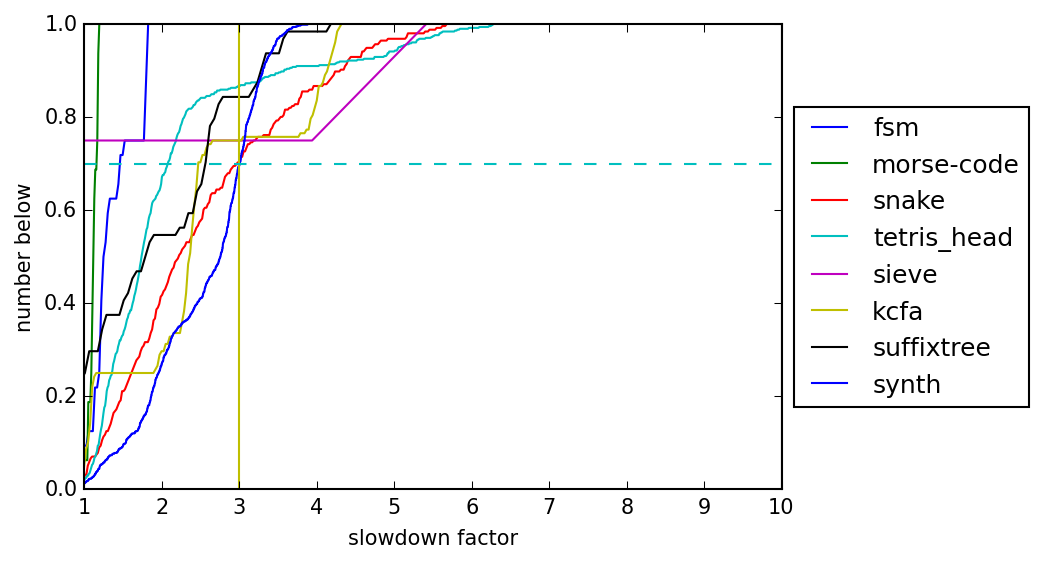

In [82]:
slowdown_cdf(*[(arr, None, strip_name(name)) for arr, name in zip(hs_, all_data_files)],
            name="name",
            many_weights=weights_)

## All Benchmarks for Pycket

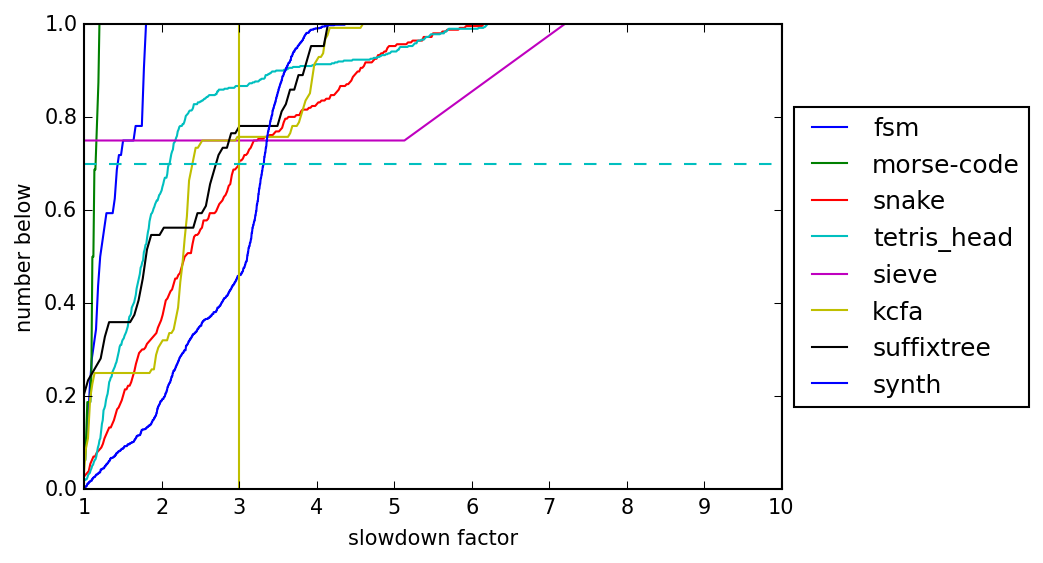

In [83]:
slowdown_cdf(*[(arr, None, strip_name(name)) for arr, name in zip(ps_, all_data_files)],
            name="name",
            many_weights=weights_)

## All Benchmarks for Racket

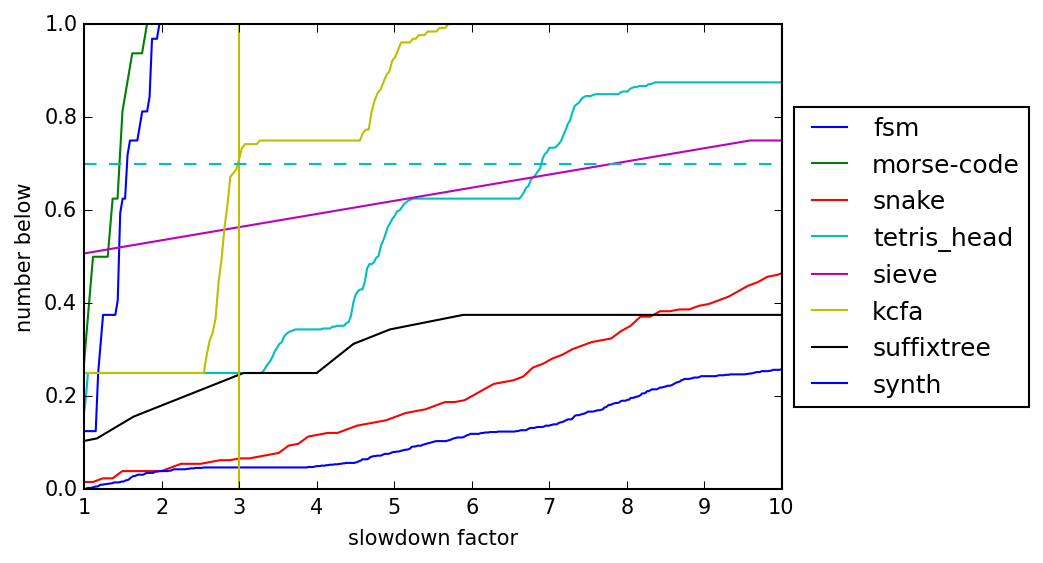

In [84]:
slowdown_cdf(*[(arr, None, strip_name(name)) for arr, name in zip(rs_, all_data_files)],
            name="name",
            many_weights=weights_)

(2036,) (2036,)


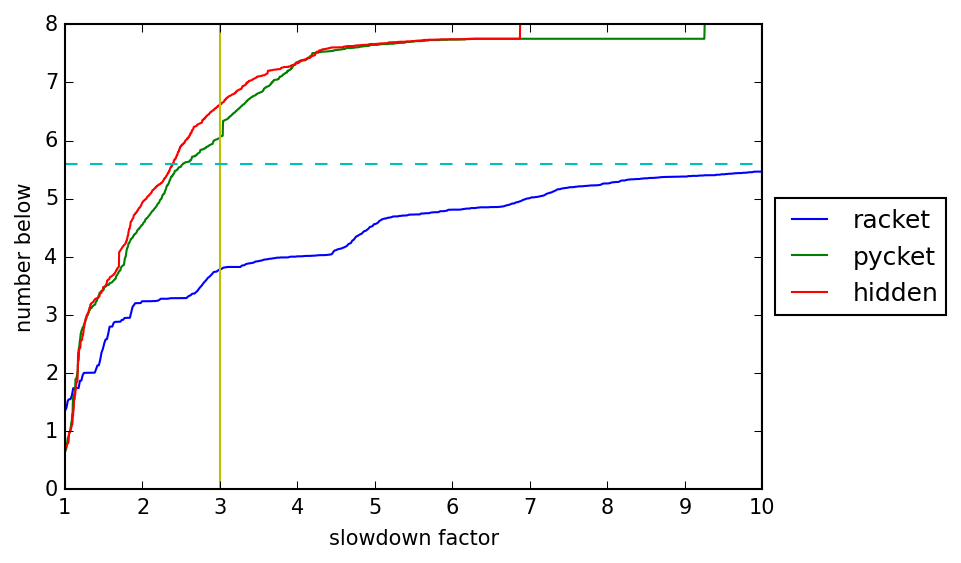

In [85]:
print hs.shape, weights.shape
slowdown_cdf((rs, 'b', 'racket'),
             (ps, 'g', 'pycket'),
             (hs, 'r', 'hidden'),
             weights=weights,
             name="all_data")

# Slowdown Summary Stats

In [86]:
DataFrame({'racket':racket, 'pycket':pycket, 'hidden':hidden}).describe()

,hidden,pycket,racket
count,512.000000,512.000000,512.000000
mean,4069.951172,4484.888672,23811.226562
std,2790.554359,3258.402996,23789.747875
min,862.000000,859.000000,608.000000
25%,1774.250000,1980.500000,6679.000000
50%,3489.000000,3772.500000,17036.000000
75%,5541.750000,5984.750000,32848.000000
max,11962.000000,13502.000000,103904.000000


# Deliverability Stats

## L = 0

In [87]:
slowdown_graph = lnm.fromkeyvals_transpose(variations, racket_slowdown, pycket_slowdown, hidden_slowdown)
racket_slowdown0, pycket_slowdown0, hidden_slowdown0, tbl = compute_lnm_deliverable(slowdown_graph, 0)
tbl

,racket,hidden,pycket
Max overhead,138.1702,12.5916,14.2878
Mean overhead,31.6639,4.2842,4.7459
Median overhead,22.6543,3.6726,3.9921
300-deliverable,128 (25.00%),235 (45.90%),220 (42.97%)
300/1000-usable,0 (0.00%),234 (45.70%),229 (44.73%)


## L = 1

In [88]:
racket_slowdown1, pycket_slowdown1, hidden_slowdown1, tbl = compute_lnm_deliverable(slowdown_graph, 1)
tbl

,racket,hidden,pycket
Max overhead,26.9734,2.8789,3.2063
Mean overhead,6.5696,1.5983,1.6959
Median overhead,1.1223,1.2684,1.2624
300-deliverable,320 (62.50%),512 (100.00%),506 (98.83%)
300/1000-usable,0 (0.00%),0 (0.00%),6 (1.17%)


## L = 2

In [89]:
racket_slowdown2, pycket_slowdown2, hidden_slowdown2, tbl = compute_lnm_deliverable(slowdown_graph, 2)
tbl

,racket,hidden,pycket
Max overhead,2.2606,1.5547,1.5704
Mean overhead,0.9957,1.0919,1.0853
Median overhead,0.8617,1.0463,1.0349
300-deliverable,512 (100.00%),512 (100.00%),512 (100.00%)
300/1000-usable,0 (0.00%),0 (0.00%),0 (0.00%)


# Slowdown distribution

## L = 0

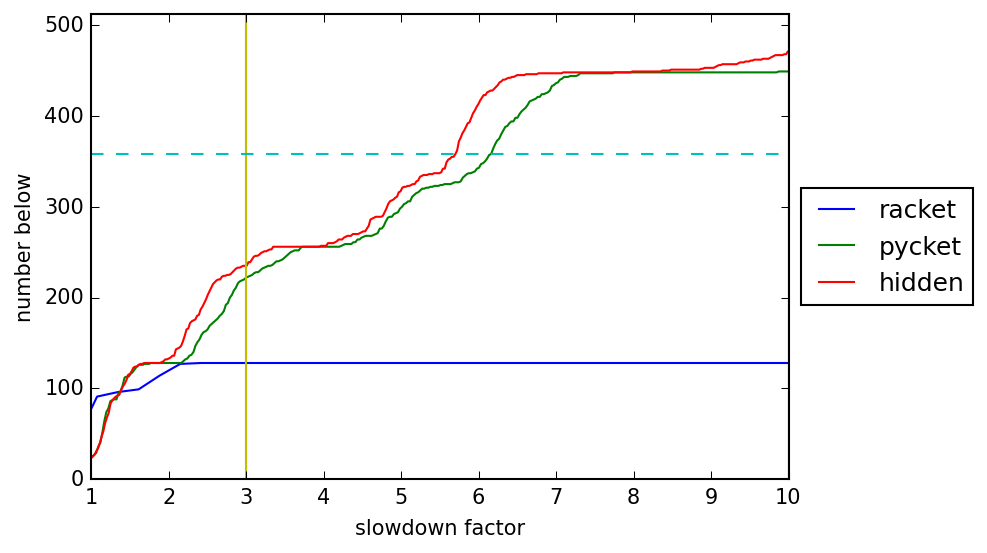

In [90]:
slowdown_cdf((racket_slowdown0, 'b', 'racket'),
             (pycket_slowdown0, 'g', 'pycket'),
             (hidden_slowdown0, 'r', 'hidden'),
             name="%s_l=0" % benchmark)

## L = 1

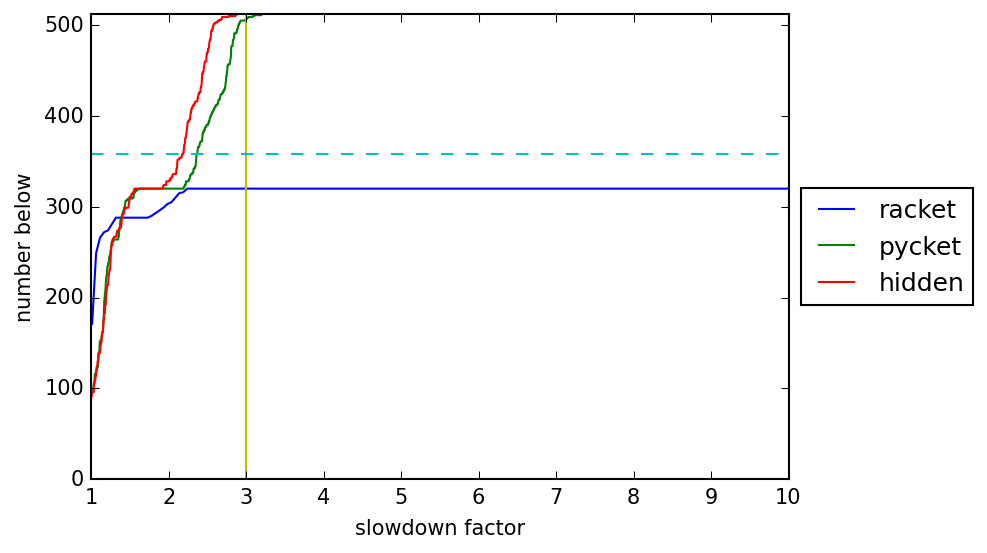

In [91]:
slowdown_cdf((racket_slowdown1, 'b', 'racket'),
             (pycket_slowdown1, 'g', 'pycket'),
             (hidden_slowdown1, 'r', 'hidden'),
             name="%s_l=1" % benchmark)

## L = 2

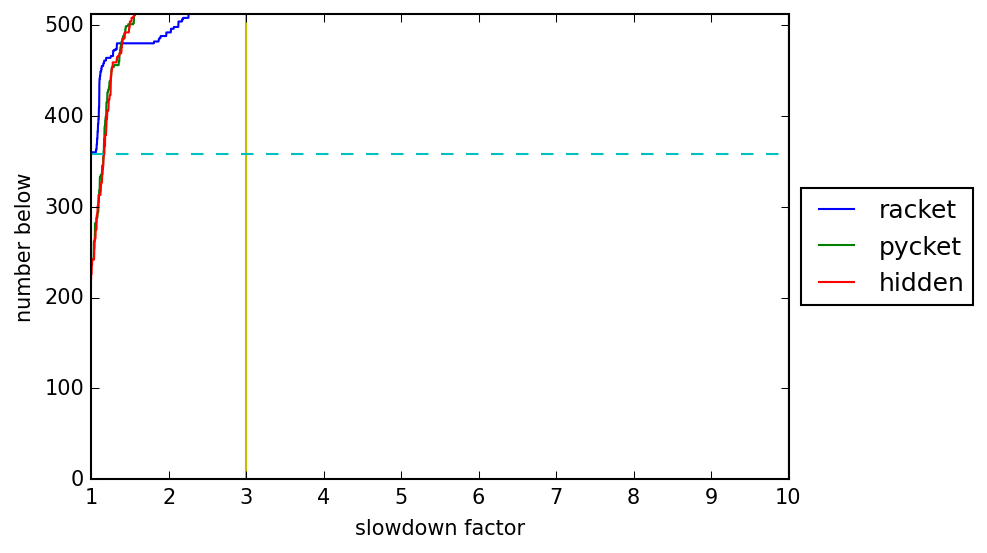

In [92]:
slowdown_cdf((racket_slowdown2, 'b', 'racket'),
             (pycket_slowdown2, 'g', 'pycket'),
             (hidden_slowdown2, 'r', 'hidden'),
             name="%s_l=2" % benchmark)